# Hypothesis Testing Exercise

By Lindy Castellaw, Jessica Gardin, David Schneemann, Meredith Wang

# 1 Has the network latency gone up since we switched internet service providers?

H0 = Network latency is equal or has increased.

Ha = Network Latency has decreased.

True Positive

    small p-value -- < alpha (.001)
    reject 𝐻0

    (The data shows that survey score did improve)
    avg survey score before switching internet service: 65 ms
    avg survey score after switching internet service: 60 ms

False Positive

    small p-value
    reject 𝐻0
    
    avg survey score before switching internet service: 65 ms
    avg survey score after switching internet service: 60 ms

    test was re-taken while internet activity had significantly increased, causing an increase in ping time

True Negative

    higher p-value
    fail to reject 𝐻0

   
    avg survey score before switching internet service: 65 ms
    avg survey score after switching internet service: 60 ms

False Negative

    higher p-value
    fail to reject 𝐻0
    
    test was originally taken while internet activity had significantly increased, causing an increase in ping time



# 2 Is the website redesign any good?

H0 = Website has same or fewer visits.

Ha = Website has more visits.

True Positive

    small p-value -- < alpha (.001)
    reject 𝐻0

    (The data shows that redesign did improve the website)
    avg visits before redesign: 1,000
    avg visits after redesign: 5,000
    
    website design is genuinely better

False Positive

    small p-value
    reject 𝐻0

    avg visits before redesign: 1,000
    avg visits after redesign: 5,000
    
    Second test was done on Cyber Monday

True Negative

    higher p-value
    fail to reject 𝐻0

    (The data shows that the website did worse after redesign)
    avg visits before redesign: 5,000
    avg visits after redesign: 1,000
    
    website is genuinely worse

False Negative

    higher p-value
    fail to reject 𝐻0
    
    (The data shows that the website did worse after redesign)
    avg visits before redesign: 5,000
    avg visits after redesign: 1,000

    website crashed during re-test

# 3 Is our television ad driving more sales?

H0 = Monthly Avg sales stayed the same or decreased after airing ad

Ha = Monthly Avg sales increased after airing ad

True Positive

    small p-value -- < alpha (.001)
    reject 𝐻0

    (The data shows that sales increased after airing ad)
    avg monthly sales before ad: 10,000
    avg monthly sales after ad: 15,000

False Positive

    small p-value
    reject 𝐻0

    (The data shows that sales increased after airing ad)
    avg monthly sales before ad: 10,000
    avg monthly sales after ad: 15,000
    
    competitor across street closed for second test

True Negative

    higher p-value
    fail to reject 𝐻0

    (The data shows that sales decreased after airing ad)
    avg monthly sales before ad: 15,000
    avg monthly sales after ad: 10,000

False Negative

    higher p-value
    fail to reject 𝐻0
    
    (The data shows that sales decreased after airing ad)
    avg monthly sales before ad: 15,000
    avg monthly sales after ad: 10,000

    extreme weather caused lower customer traffic 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# T-Test Exercises

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
# Ho = sales of office 1 and 2 are equal (=)
# Ha = sales of office 1 are different from office 2 (!=)

mean1 = 90
std1 = 15
nobs1 = 40
mean2 = 100
std2 = 20
nobs2 = 50
alpha = 0.05

In [3]:
t,p = stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')

In [4]:
t, p, alpha

(-2.6252287036468456, 0.01020985244923939, 0.05)

In [5]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [45]:
# The sales of office 1 are different from office 2

#### Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [6]:
from pydataset import data

In [7]:
data('mpg', show_doc=True) # view the documentation for the dataset
mpg = data('mpg') # load the dataset and store it in a variable

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [8]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [9]:
mpg['average_mileage'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [13]:
sample_2008 = mpg[mpg.year == 2008].average_mileage
sample_1999 = mpg[mpg.year == 1999].average_mileage

In [14]:
sample_1999.size

117

Ho = There is no difference in fuel-efficiency in cars 2008 vs 1999
Ha = There is significant difference in fuel-efficiency

In [15]:
sample_2008.var(), sample_1999.var()

(24.097480106100797, 27.122605363984682)

In [46]:
t, p = stats.ttest_ind(sample_2008,sample_1999, equal_var=True)

In [47]:
t,p,alpha

(-0.21960177245940962, 0.8263744040323578, 0.05)

In [ ]:
# We fail to reject Ho
# Thus, we determine there is no significant difference in fuel efficiency
# in cars from 2008 vs 1999.

#### Are compact cars more fuel-efficient than the average car?

Ho = Compact cars are as or less fuel-efficient than the avg car

Ha = Compact cars are more fuel-efficient than the avg car

In [27]:
mpg.head(40)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0


In [41]:
avg_car_sample = mpg[mpg['class'] != 'compact'].average_mileage
compact_sample = mpg[mpg['class'] == 'compact'].average_mileage

In [42]:
compact_sample

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
142    25.0
143    23.0
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
Name: average_mileage, dtype: float64

In [48]:
compact_sample.var(), avg_car_sample.var()

(12.442876965772433, 23.652794548904602)

In [55]:
# alternative method for determining t & p if variances 
# are significantly different
stats.levene(compact_sample, avg_car_sample)

LeveneResult(statistic=11.107991264810888, pvalue=0.001000307619344077)

In [43]:
t, p = stats.ttest_ind(compact_sample, avg_car_sample, equal_var=False)

In [44]:
t,p/2,alpha

(8.128810422808078, 8.009030328061537e-13, 0.05)

In [37]:
# We reject Ho
# Thus, we determine that compact cars ARE more fuel-efficient
# than the avg car

#### Do manual cars get better gas mileage than automatic cars?

Ho = manual cars get the same or worse gas mileage than automatic cars

Ha = manual cars get better gas mileage than automatic cars

In [33]:
manual_sample = mpg[mpg['trans'].str.startswith('manual')].average_mileage
automatic_sample = mpg[mpg['trans'].str.startswith('auto')].average_mileage

In [52]:
manual_sample.head()

2     25.0
3     25.5
6     22.0
8     22.0
10    24.0
Name: average_mileage, dtype: float64

In [49]:
manual_sample.var(), automatic_sample.var()

(26.635167464114826, 21.942777233382337)

In [50]:
t, p = stats.ttest_ind(manual_sample, automatic_sample, equal_var=True)

In [51]:
t,p/2,alpha

(4.593437735750014, 3.5771872005728416e-06, 0.05)

In [38]:
# We reject Ho
# Thus, we determine that manual cars get better gas mileage
# than automatic cars

# Correlation Exercises

### 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [95]:
from math import sqrt

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import correlation_lesson_util

In [56]:
df = pd.read_csv('telco_churn.csv')

In [57]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df.tenure.head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [61]:
x = df.tenure
y = df.MonthlyCharges

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

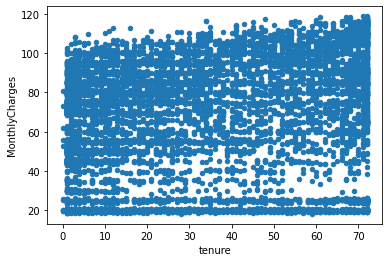

In [70]:
df.plot.scatter(x='tenure',y='MonthlyCharges')

In [66]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.24789985628615002
p = 4.0940449915016345e-99


In [ ]:
# r value indicates poor correlation between tenure and monthly charges

##### Total Charges?

In [91]:
df = df.dropna()

In [92]:
x = df.tenure
y = df.TotalCharges

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

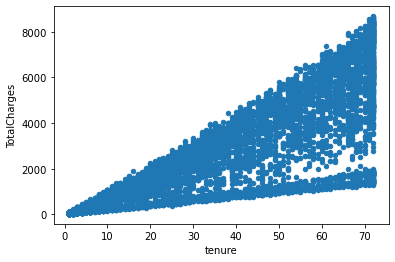

In [73]:
df.plot.scatter(x='tenure',y='TotalCharges')

In [93]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.8258804609332018
p = 0.0


In [ ]:
# There is a strong correlation between tenure and Total charges

##### Controlling for phone and internet service:

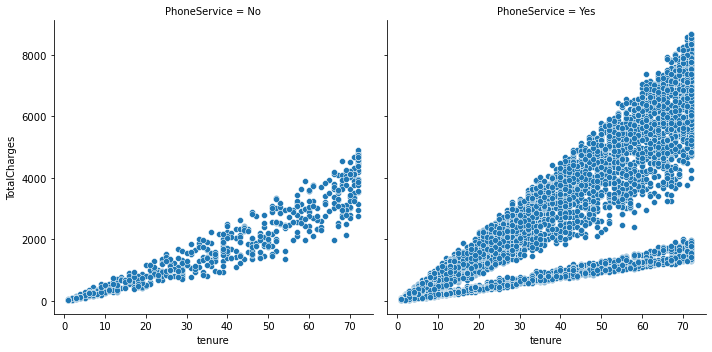

In [101]:
sns.relplot(data=df, y='TotalCharges', x='tenure', col='PhoneService')

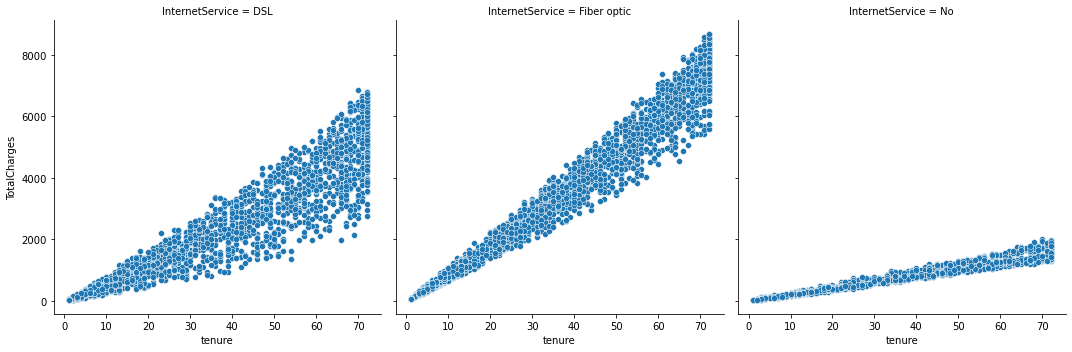

In [102]:
sns.relplot(data=df, y='TotalCharges', x='tenure', col='InternetService')

In [ ]:
# We see potentially better correlations when controlling for phone and internet service.

### 2. use the `employees` database

In [103]:
from env import host, user, password

In [104]:
def get_db_url(dbname, username=user, hostname=host, passw=password):
    url = f'mysql+pymysql://{username}:{passw}@{hostname}/employees'
    return url

In [105]:
url = get_db_url('employees', user, host, password)

In [130]:
employees = pd.read_sql('SELECT * FROM employees',url)

In [136]:
salaries = pd.read_sql('SELECT *, datediff(now(), employees.hire_date) AS tenure FROM employees join salaries using (emp_no) join titles using (emp_no) where salaries.to_date > now()', url)

In [168]:
titles = pd.read_sql('SELECT emp_no, datediff(now(), hire_date) as tenure, count(*) AS title_count FROM employees join titles using (emp_no) group by emp_no', url)

##### Is there a relationship between how long an employee has been with the company and their salary?

In [137]:
emp_sal_emp = pd.merge(employees, salaries, on='emp_no', how='outer')

In [149]:
emp_sal_emp.head()

,emp_no,birth_date_x,first_name_x,last_name_x,gender_x,hire_date_x,birth_date_y,first_name_y,last_name_y,gender_y,hire_date_y,salary,from_date,to_date,title,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1953-09-02,Georgi,Facello,M,1986-06-26,88958.0,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,13150.0
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527.0,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,13367.0
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,1959-12-03,Parto,Bamford,M,1986-08-28,43311.0,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,13087.0
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057.0,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12992.0
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057.0,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12992.0


In [138]:
emp_sal_emp.tenure

0         13150.0
1         13367.0
2         13087.0
3         12992.0
4         12992.0
           ...   
431138    13216.0
431139    13216.0
431140    10484.0
431141    10484.0
431142     8975.0
Name: tenure, Length: 431143, dtype: float64

In [145]:
emp_sal_emp = emp_sal_emp.dropna()

In [146]:
x = emp_sal_emp.tenure
y = emp_sal_emp.salary

<AxesSubplot:xlabel='tenure', ylabel='salary'>

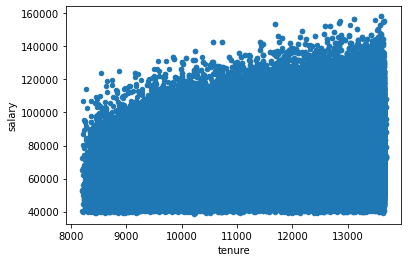

In [150]:
emp_sal_emp.plot.scatter(x='tenure',y='salary')

In [151]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.30728190932146726
p = 0.0


In [ ]:
# We are 95% confident there is a weak correlation 
# between tenure of an employee and their salary

#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [172]:
emp_set = pd.merge(emp_sal_emp, titles, on='emp_no', how='outer')

In [173]:
emp_set.head()

,emp_no,birth_date_x,first_name_x,last_name_x,gender_x,hire_date_x,birth_date_y,first_name_y,last_name_y,gender_y,hire_date_y,salary,from_date,to_date,title,from_date,to_date,tenure_x,tenure_y,title_count
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1953-09-02,Georgi,Facello,M,1986-06-26,88958.0,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,13150.0,13150,1
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527.0,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,13367.0,13367,1
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,1959-12-03,Parto,Bamford,M,1986-08-28,43311.0,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,13087.0,13087,1
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057.0,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12992.0,12992,2
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057.0,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12992.0,12992,2


In [181]:
emp_set = emp_set.dropna()

In [182]:
x = emp_set.tenure_x
y = emp_set.title_count

<AxesSubplot:xlabel='tenure_x', ylabel='title_count'>

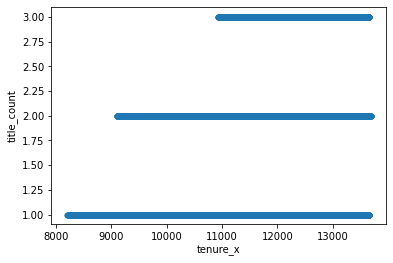

In [183]:
emp_set.plot.scatter(x='tenure_x',y='title_count')

In [184]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.2874004366228011
p = 0.0


In [ ]:
# We are 95% confident there is a weak correlation
# between tenure of an employee and their number of titles

### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [185]:
data('sleepstudy', show_doc=True) # view the documentation for the dataset
ss = data('sleepstudy')

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [187]:
ss.info

<bound method DataFrame.info of      Reaction  Days  Subject
1    249.5600     0      308
2    258.7047     1      308
3    250.8006     2      308
4    321.4398     3      308
5    356.8519     4      308
..        ...   ...      ...
176  329.6076     5      372
177  334.4818     6      372
178  343.2199     7      372
179  369.1417     8      372
180  364.1236     9      372

[180 rows x 3 columns]>

In [186]:
ss.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [188]:
x = ss.Days
y = ss.Reaction

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

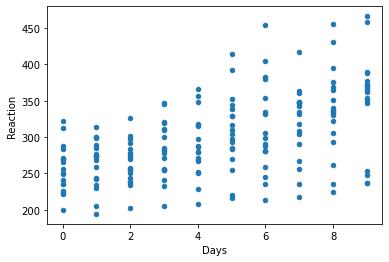

In [195]:
ss.plot.scatter(x='Days',y='Reaction')

In [191]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.5352302262650253
p = 9.894096322214812e-15


In [192]:
# We see a medium-strength correlation between days and reaction time